In [1]:
#This is an extension to my portfolio-analyser miniproject
#Here I'm attempting to optimize(rebalance) a user's portfolio by using the concept of efficient frontier
#The efficient frontier is a concept in Modern Portfolio Theory which is used to optimize the portfolio in a way
#that maximizes the returns on the portfolio for a particular level of risk

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
plt.style.use('ggplot')

In [3]:
#Defining stock portfolio and initial weights
portfolio = ["TSLA","AAPL","DIS","NFLX","XOM"]
init_weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
#importing historical data for 1 year for these stocks
tsla = pd.read_csv('TESLA.csv')
aapl = pd.read_csv('APPLE.csv')
nflx = pd.read_csv('NETFLIX.csv')
dis = pd.read_csv('DISNEY.csv')
xom = pd.read_csv('EXXON.csv')

In [5]:
#Creating a dataframe containing the adjusted closing prices of all stocks in the portfolio
df = pd.DataFrame()
df['Date'] = tsla['Date']
df['Tesla'] = tsla['Adj Close']
df['Apple'] = aapl['Adj Close']
df['Netflix'] = nflx['Adj Close']
df['Disney'] = dis['Adj Close']
df['Exxon'] = xom['Adj Close']

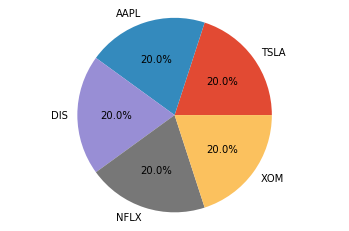

In [6]:
#visualizing the portfolio
fig1, ax1 = plt.subplots()
ax1.pie(init_weights, labels=portfolio,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [7]:
df = df.set_index('Date')

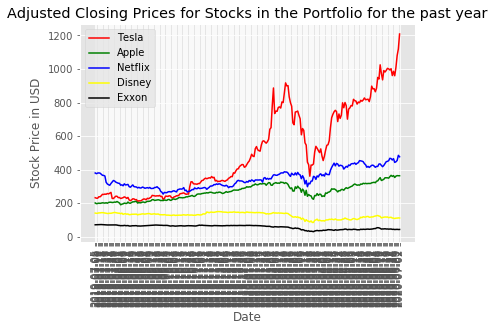

In [8]:
#Visualising the change in stock prices over past year
plt.plot(df['Tesla'],label='Tesla',color='red')
plt.plot(df['Apple'],label='Apple',color='green')
plt.plot(df['Netflix'],label='Netflix',color='blue')
plt.plot(df['Disney'],label='Disney',color='yellow')
plt.plot(df['Exxon'],label='Exxon',color='black')
plt.title("Adjusted Closing Prices for Stocks in the Portfolio for the past year")
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Stock Price in USD')
plt.legend()
plt.show()

In [9]:
#Calculating daily returns on all stocks
daily_returns = df.pct_change(1)
daily_returns.head()

,Tesla,Apple,Netflix,Disney,Exxon
Date,,,,,
2019-07-05,NaN,NaN,NaN,NaN,NaN
2019-07-08,-0.011840,-0.020614,-0.011536,-0.010039,0.004598
2019-07-09,-0.001216,0.006099,0.010022,0.004184,-0.000654
2019-07-10,0.038512,0.009889,0.002816,0.013629,0.014131
2019-07-11,-0.001339,-0.007282,-0.003937,0.000139,0.000774


In [10]:
#Finding the covariance matrix for stock returns
'''
The covariance matrix is used to calculate the standard deviation of a portfolio of stocks,
which in turn is used by portfolio managers to quantify the risk associated with a particular portfolio.
The diagonal elements are a measure of a stock return's deviation from average returns for that stock
Covariance is a measure of the joint variability of two random variables.
If the two variables increase and decrease simultaneously then the covariance value will be positive.
Conversely if one increases while the other decreases then the covariance will be negative.
Higher the variance of the asset price, higher the risk and volatility
'''
#We find the annualized covariance matrix by multiplying by 252 (Approx. no. of trading days/year)
annual_cov_matrix = 252*daily_returns.cov()
annual_cov_matrix

,Tesla,Apple,Netflix,Disney,Exxon
Tesla,0.606953,0.147634,0.118301,0.154526,0.138868
Apple,0.147634,0.165033,0.092317,0.123472,0.121735
Netflix,0.118301,0.092317,0.179023,0.067147,0.056622
Disney,0.154526,0.123472,0.067147,0.194306,0.141041
Exxon,0.138868,0.121735,0.056622,0.141041,0.214330


In [11]:
#Finding the correlation matrix for stock returns
'''
The correlation coefficient is measured on a scale from -1 to 1.
A correlation coefficient of 1 indicates a perfect positive correlation between the prices of two stocks,
meaning the stocks always move the same direction by the same amount. 
A coefficient of -1 indicates a perfect negative correlation,
meaning that the stocks have historically always moved in the opposite direction. 
If two stocks have a correlation coefficient of 0, it means there is no correlation and,
therefore, no relationship between the stocks.
'''
daily_returns.corr()

,Tesla,Apple,Netflix,Disney,Exxon
Tesla,1.000000,0.466471,0.358888,0.449966,0.385020
Apple,0.466471,1.000000,0.537086,0.689512,0.647278
Netflix,0.358888,0.537086,1.000000,0.360021,0.289059
Disney,0.449966,0.689512,0.360021,1.000000,0.691132
Exxon,0.385020,0.647278,0.289059,0.691132,1.000000


In [12]:
#Calculating the volatility and variance of the portfolio
#Volatility can be defined as standard deviation of stock from mean returns
#Variance is volatility squared
print("Variance of stocks")
print(daily_returns.var())
print("\nVolatility of stocks")
print(daily_returns.std())

Variance of stocks
Tesla      0.002409
Apple      0.000655
Netflix    0.000710
Disney     0.000771
Exxon      0.000851
dtype: float64

Volatility of stocks
Tesla      0.049077
Apple      0.025591
Netflix    0.026653
Disney     0.027768
Exxon      0.029164
dtype: float64


In [13]:
#We have determined the variance and volatilities of individual stocks
#Now we calculate the variance of the overall portfolio
#Portfolio variance is calculated by multiplying the squared weight of each security by
#its corresponding variance and adding twice the weighted average weight multiplied by
#the covariance of all individual security pairs.
portfolio_variance = np.dot(init_weights.T,np.dot(annual_cov_matrix,init_weights))
portfolio_variance

0.14731886771920266

In [14]:
#Calculating the portfolio volatility
portfolio_volatility = math.sqrt(portfolio_variance)
portfolio_volatility

0.3838214008092861

In [15]:
#Calculating annual returns of the portfolio
annual_port_return = 252*np.sum(daily_returns.mean())
print("Annual Portfolio Return=",(100*annual_port_return),"%")

Annual Portfolio Return= 243.25232663640497 %


In [16]:
#Summary for current portfolio
print("Portfolio Variance=",portfolio_variance*100,"%")
print("Portfolio Volatility=",portfolio_volatility*100,"%")
print("Annual Portfolio Return=",(100*annual_port_return),"%")

Portfolio Variance= 14.731886771920266 %
Portfolio Volatility= 38.382140080928615 %
Annual Portfolio Return= 243.25232663640497 %


In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
#Portfolio optimization using efficient frontier
#Calculating expected returns and annualized sample covariance matrix of asset returns
exp_ret = expected_returns.mean_historical_return(df)
samp_cov_mat = risk_models.sample_cov(df)
print(exp_ret)
print(samp_cov_mat)

Tesla      1.960002
Apple      0.675596
Netflix    0.316418
Disney    -0.136896
Exxon     -0.382596
dtype: float64
            Tesla     Apple   Netflix    Disney     Exxon
Tesla    0.606953  0.147634  0.118301  0.154526  0.138868
Apple    0.147634  0.165033  0.092317  0.123472  0.121735
Netflix  0.118301  0.092317  0.179023  0.067147  0.056622
Disney   0.154526  0.123472  0.067147  0.194306  0.141041
Exxon    0.138868  0.121735  0.056622  0.141041  0.214330


In [22]:
#The portfolio can be optimized using the Sharpe Ratio as a parameter
#The Sharpe ratio is used to measure the returns of an asset in excess of another asset that is relatively risk-free
# The risk-free rate of return is the return on an investment with zero risk,
#meaning it's the return investors could expect for taking no risk.
#The yield for a U.S. Treasury bond, for example, could be used as the risk-free rate.
#Generally, the greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.
#Defining the efficient frontier as a function of expected returns and the return covariance
ef = EfficientFrontier(exp_ret,samp_cov_mat)
#Redefining weights to optimize for sharpe ratio
weights = ef.max_sharpe()
print(weights)

OrderedDict([('Tesla', 0.6670292006481954), ('Apple', 0.3329707993518047), ('Netflix', 0.0), ('Disney', 0.0), ('Exxon', 0.0)])


In [24]:
#Describing portfolio performance
ef.portfolio_performance(verbose=True)

Expected annual return: 153.2%
Annual volatility: 59.5%
Sharpe Ratio: 2.54


(1.5323323921628886, 0.594917610132145, 2.542087116612609)

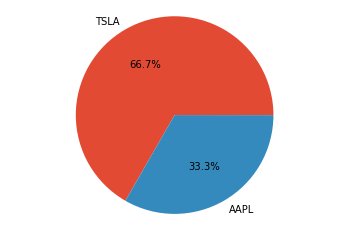

In [28]:
#visualizing the portfolio optimized for Sharpe Ratio
optimum_weights = np.array([0.667,0.3329])
opt_portfolio = ["TSLA","AAPL"]
fig1, ax1 = plt.subplots()
ax1.pie(optimum_weights, labels=opt_portfolio,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()